In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

,index,Unnamed: 0,building id,Peak Load
0,304,0,305,2.931349
1,210,0,211,3.267824
2,233,0,234,3.335892
3,338,0,339,3.346160
4,99,0,100,4.456120
...,...,...,...,...
395,385,0,386,27.341019
396,0,0,1,27.724174
397,4,0,5,27.902137
398,399,0,400,28.411462


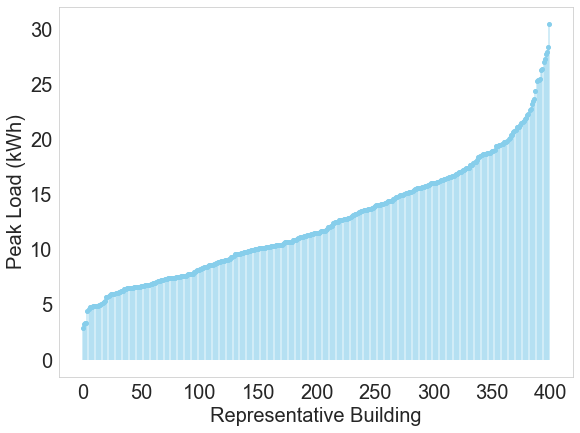

In [2]:
# Read building peak load:
load_folder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\Peakload.xlsx"
peakLoad = pd.read_excel(load_folder)

# Graph peak load:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_peakLoad = peakLoad.sort_values(by='Peak Load')
ordered_peakLoad = ordered_peakLoad.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['Peak Load'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Peak Load (kWh)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass
0,304,0,305,2.931349,3.908466,10.422497,10.422497
1,210,0,211,3.267824,4.357098,11.618842,11.618842
2,233,0,234,3.335892,4.447856,11.860861,11.860861
3,338,0,339,3.346160,4.461547,11.897369,11.897369
4,99,0,100,4.456120,5.941494,15.843865,15.843865
...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.211787,97.211787
396,0,0,1,27.724174,36.965566,98.574106,98.574106
397,4,0,5,27.902137,37.202850,99.206859,99.206859
398,399,0,400,28.411462,37.881950,101.017779,101.017779


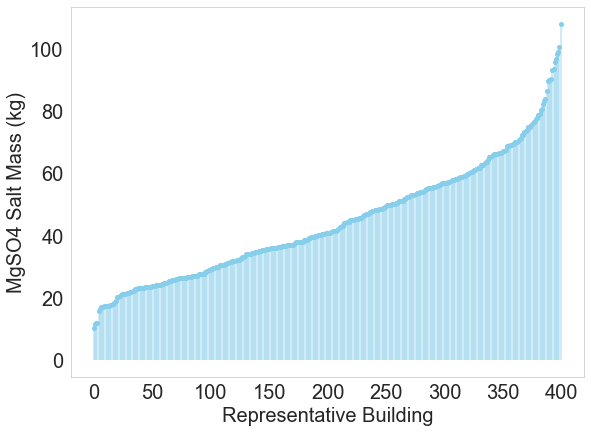

In [4]:
# Calculate salt masses required for MgSO4:
ordered_peakLoad['MgSO4 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.75
ordered_peakLoad['MgSO4 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.2812521
ordered_peakLoad['MgSO4 Salt Mass'] = ordered_peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
ordered_peakLoad

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgSO4 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgSO4 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass
0,304,0,305,2.931349,5.995942,1.448295,5.995942,15.162151,34.529722,34.529722
1,210,0,211,3.267824,6.684185,1.614537,6.684185,16.902537,38.493211,38.493211
2,233,0,234,3.335892,6.823415,1.648168,6.823415,17.254614,39.295018,39.295018
3,338,0,339,3.346160,6.844418,1.653241,6.844418,17.307724,39.415969,39.415969
4,99,0,100,4.456120,9.114792,2.201641,9.114792,23.048899,52.490707,52.490707
...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,55.924812,13.508409,55.924812,141.419065,322.062538,322.062538
396,0,0,1,27.724174,56.708539,13.697715,56.708539,143.400902,326.575900,326.575900
397,4,0,5,27.902137,57.072554,13.785641,57.072554,144.321400,328.672208,328.672208
398,399,0,400,28.411462,58.114355,14.037284,58.114355,146.955840,334.671783,334.671783


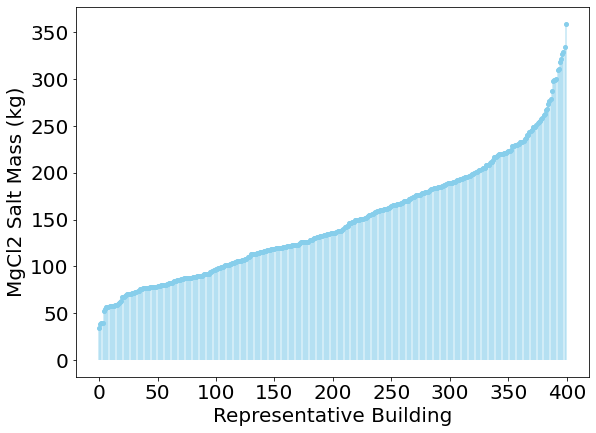

In [12]:
# Calculate salt masses required for MgCl2:
ordered_peakLoad['MgCl2 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.1933333333
ordered_peakLoad['MgCl2 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.08489351
ordered_peakLoad['MgCl2 Salt Mass'] = ordered_peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
ordered_peakLoad

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgCl2 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgCl2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,K2CO3 Salt Mass E,K2CO3 Salt Mass P,K2CO3 Salt Mass
0,304,0,305,2.931349,5.995942,1.448295,5.995942,15.162151,34.529722,34.529722,15.868958,1.791712,15.868958
1,210,0,211,3.267824,6.684185,1.614537,6.684185,16.902537,38.493211,38.493211,17.690475,1.997373,17.690475
2,233,0,234,3.335892,6.823415,1.648168,6.823415,17.254614,39.295018,39.295018,18.058964,2.038978,18.058964
3,338,0,339,3.346160,6.844418,1.653241,6.844418,17.307724,39.415969,39.415969,18.114550,2.045254,18.114550
4,99,0,100,4.456120,9.114792,2.201641,9.114792,23.048899,52.490707,52.490707,24.123359,2.723689,24.123359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,55.924812,13.508409,55.924812,141.419065,322.062538,322.062538,148.011533,16.711494,148.011533
396,0,0,1,27.724174,56.708539,13.697715,56.708539,143.400902,326.575900,326.575900,150.085756,16.945688,150.085756
397,4,0,5,27.902137,57.072554,13.785641,57.072554,144.321400,328.672208,328.672208,151.049165,17.054463,151.049165
398,399,0,400,28.411462,58.114355,14.037284,58.114355,146.955840,334.671783,334.671783,153.806413,17.365775,153.806413


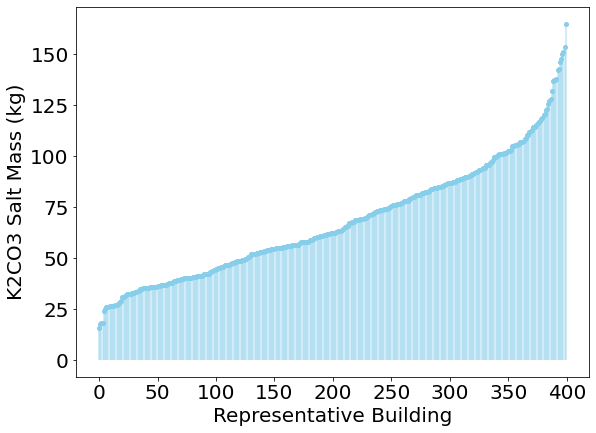

In [13]:
# Calculate salt masses required for K2CO3:
ordered_peakLoad['K2CO3 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.1847222222
ordered_peakLoad['K2CO3 Salt Mass P'] = ordered_peakLoad['Peak Load']/1.636060713
ordered_peakLoad['K2CO3 Salt Mass'] = ordered_peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
ordered_peakLoad

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['K2CO3 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("K2CO3 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,SrBr2 Salt Mass E,SrBr2 Salt Mass P,SrBr2 Salt Mass
0,304,0,305,2.931349,3.908466,10.422497,10.422497,9.681521,22.961638,22.961638
1,210,0,211,3.267824,4.357098,11.618842,11.618842,10.792812,25.597286,25.597286
2,233,0,234,3.335892,4.447856,11.860861,11.860861,11.017625,26.130473,26.130473
3,338,0,339,3.346160,4.461547,11.897369,11.897369,11.051537,26.210903,26.210903
4,99,0,100,4.456120,5.941494,15.843865,15.843865,14.717462,34.905367,34.905367
...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.211787,97.211787,90.300614,214.165739,214.165739
396,0,0,1,27.724174,36.965566,98.574106,98.574106,91.566081,217.167042,217.167042
397,4,0,5,27.902137,37.202850,99.206859,99.206859,92.153848,218.561049,218.561049
398,399,0,400,28.411462,37.881950,101.017779,101.017779,93.836023,222.550658,222.550658


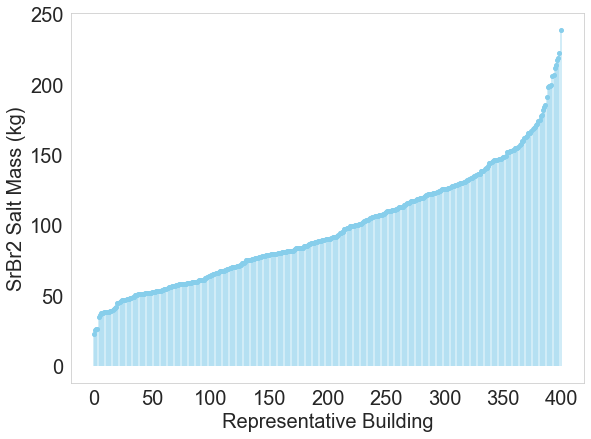

In [5]:
# Calculate salt masses required for K2CO3:
ordered_peakLoad['SrBr2 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.3027777778
ordered_peakLoad['SrBr2 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.1276629
ordered_peakLoad['SrBr2 Salt Mass'] = ordered_peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
ordered_peakLoad

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['SrBr2 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("SrBr2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad